In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

from lib.tools import *
from lib.jpeg import *
from lib.decomposition import *
from lib.regression import *
from lib.sketchml import *

# Low rank tensor

## Generate a low rank tensor

In [2]:
tensor_shape = (128,128,3)
tensor_size  = 128*128*3
rank = 4

In [3]:
# CP decomposition: Creating factor matrices for the tensor
factor_1 = torch.randn(tensor_shape[0], rank)
factor_2 = torch.randn(tensor_shape[1], rank)
factor_3 = torch.randn(tensor_shape[2], rank)
tensor = torch.einsum('ir,jr,kr->ijk', factor_1, factor_2, factor_3)

In [4]:
# manipulate the tensor
value_mask = abs(tensor)>0.001
tensor = tensor* value_mask

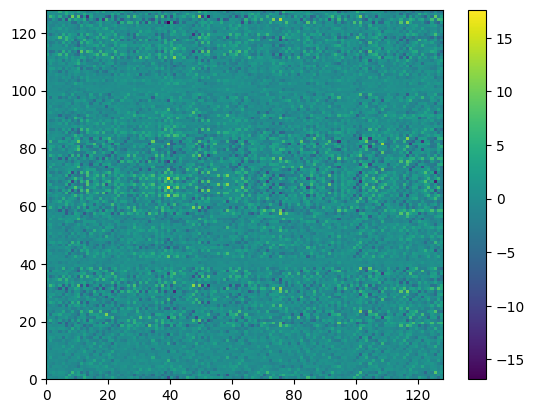

In [5]:
plot_tensor = tensor.reshape([3,128,128])
plt.figure()
plt.pcolormesh(plot_tensor[0])
plt.colorbar()

## Get tensor charateristics

In [6]:
actual_rank= calculate_cp_rank(tensor.numpy())
print("The acutal rank of the tensor is: ", actual_rank)

Testing rank: 1
Error:2.9325695
Testing rank: 2
Error:1.2732763
Testing rank: 3
Error:0.12198684
Testing rank: 4
Error:1.7821095e-06
The acutal rank of the tensor is:  4


In [7]:
sparsity = calculate_sparsity(tensor.numpy())
print("The sparsity of the tensor is: ", sparsity)

The sparsity of the tensor is:  0.0007120768229166666


## Tensor compression

#### Jpeg

In [8]:
normalize_base, scale,zero_point, encoded_data, compressed_size_jpeg = compressor_jpeg(tensor, 100)
print("Compressed size: ", compressed_size_jpeg)

Compressed size:  38960


In [9]:
reconstructed_tensor_jpeg = decompressor_jpeg(tensor.shape,normalize_base, scale,zero_point, encoded_data )
snr_jpeg = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_jpeg.numpy())
mse_jpeg = calculate_mse(tensor.numpy(), reconstructed_tensor_jpeg.numpy())
print("Reconstruction snr (dB): ", snr_jpeg)
print("Reconstruction mse: ", mse_jpeg)

Reconstruction snr (dB):  25.446534156799316
Reconstruction mse:  0.0149605


In [10]:
lowrank_jpeg_ratio = (tensor_size*4) / compressed_size_jpeg
lowrank_jpeg_snr = snr_jpeg
lowrank_jpeg_mse = mse_jpeg / torch.max(tensor).item()

#### Tensor decomposition

In [11]:
factors, compressed_size_decomposition = compressor_decomposition(tensor, actual_rank)
print("Compressed size: ", compressed_size_decomposition)

Compressed size:  4144


In [12]:
reconstructed_tensor_decomposition = decompressor_decomposition(factors )
snr_decomposition = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_decomposition)
mse_decomposition = calculate_mse(tensor.numpy(), reconstructed_tensor_decomposition)
print("Reconstruction snr (dB): ", snr_decomposition)
print("Reconstruction mse: ", mse_decomposition)

Reconstruction snr (dB):  60.15763759613037
Reconstruction mse:  5.0563362e-06


In [13]:
lowrank_decomposition_ratio = (tensor_size*4) / compressed_size_decomposition
lowrank_decomposition_snr = snr_decomposition
lowrank_decomposition_mse = mse_decomposition / torch.max(tensor).item()

#### Regression

In [14]:
factors, x_pos, x_neg, compressed_size_regression = compressor_regression(tensor, 4)
print("Compressed size: ", compressed_size_regression)

Compressed size:  14336.0


In [15]:
reconstructed_tensor_regression = decompressor_regression(tensor.shape, factors, x_pos,x_neg )
snr_regression = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_regression.numpy())
mse_regression = calculate_mse(tensor.numpy(), reconstructed_tensor_regression.numpy())
print("Reconstruction snr (dB): ", snr_regression)
print("Reconstruction mse: ", mse_regression)

Reconstruction snr (dB):  3.242155909538269
Reconstruction mse:  2.4853294


In [16]:
lowrank_regression_ratio = (tensor_size*4) / compressed_size_regression
lowrank_regression_snr = snr_regression
lowrank_regression_mse = mse_regression / torch.max(tensor).item()

#### Sketch ML

In [17]:
minmaxsketch,bucket_means, keys, compressed_size_sketchml = compressor_sketchml(tensor,128,0.5,3)
print("Compressed size: ", compressed_size_sketchml)

Compressed size:  66373


In [18]:
reconstructed_tensor_sketchml = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)
snr_sketchml = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_sketchml.numpy())
mse_sketchml = calculate_mse(tensor.numpy(), reconstructed_tensor_sketchml.numpy())
print("Reconstruction snr (dB): ", snr_sketchml)
print("Reconstruction mse: ", mse_sketchml)

Reconstruction snr (dB):  4.787713885307312
Reconstruction mse:  1.741118


In [19]:
lowrank_sketchml_ratio = (tensor_size*4) / compressed_size_sketchml
lowrank_sketchml_snr = snr_sketchml
lowrank_sketchml_mse = mse_sketchml / torch.max(tensor).item()

# Image-like tensor

## Generate a image like tensor

In [20]:
import cv2
import torchvision.transforms as transforms

In [49]:
image = cv2.imread("./dataset/jpeg/jpeg422jfif.jpg")
image = cv2.resize(image,(128,128),interpolation = cv2.INTER_AREA)
tensor = torch.from_numpy(image)

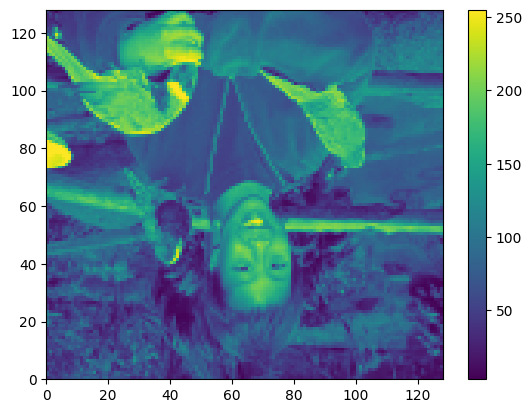

In [50]:
plt.figure()
plt.pcolormesh(tensor[:,:,1])
plt.colorbar()

In [51]:
# manipulate the tensor
value_mask = abs(tensor)>30
tensor = tensor* value_mask

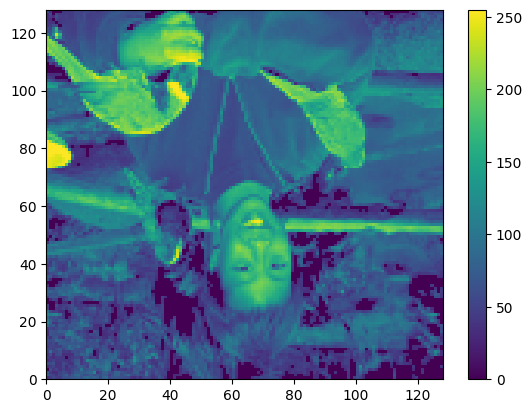

In [52]:
plt.figure()
plt.pcolormesh(tensor[:,:,1])
plt.colorbar()

## Get tensor charateristics

In [53]:
# actual_rank= calculate_cp_rank(tensor.numpy()/255)
# print("The acutal rank of the tensor is: ", actual_rank)

In [54]:
sparsity = calculate_sparsity(tensor.numpy())
print("The sparsity of the tensor is: ", sparsity)

The sparsity of the tensor is:  0.13002522786458334


## Tensor compression

#### Jpeg

In [55]:
encoded_data, compressed_size_jpeg = compressor_jpeg_direct(tensor, 100)
print("Compressed size: ", compressed_size_jpeg)

Compressed size:  35265


In [56]:
reconstructed_tensor_jpeg = decompressor_jpeg_direct(tensor.shape, encoded_data )
snr_jpeg = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_jpeg.numpy())
mse_jpeg = calculate_mse(tensor.numpy(), reconstructed_tensor_jpeg.numpy())
print("Reconstruction snr (dB): ", snr_jpeg)
print("Reconstruction mse: ", mse_jpeg)

Reconstruction snr (dB):  22.479400221502395
Reconstruction mse:  0.5435994466145834


In [57]:
image_jpeg_ratio = (tensor_size*4) / compressed_size_jpeg
image_jpeg_snr = snr_jpeg
image_jpeg_mse = mse_jpeg / torch.max(tensor).item()

#### Tensor decomposition

In [58]:
factors, compressed_size_decomposition = compressor_decomposition(tensor/255, 50)
print("Compressed size: ", compressed_size_decomposition)

Compressed size:  51800


In [59]:
reconstructed_tensor_decomposition = decompressor_decomposition(factors ) *255
snr_decomposition = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_decomposition)
mse_decomposition = calculate_mse(tensor.numpy(), reconstructed_tensor_decomposition)
print("Reconstruction snr (dB): ", snr_decomposition)
print("Reconstruction mse: ", mse_decomposition)

Reconstruction snr (dB):  1.1906017974737062
Reconstruction mse:  73.140656


In [60]:
image_decomposition_ratio = (tensor_size*4) / compressed_size_decomposition
image_decomposition_snr = snr_decomposition
image_decomposition_mse = mse_decomposition / torch.max(tensor).item() # percentage to the max value

#### Regression

In [61]:
factors, x_pos, x_neg, compressed_size_regression = compressor_regression(tensor.to(torch.float32), 15)
print("Compressed size: ", compressed_size_regression)

Compressed size:  19968.0


In [62]:
reconstructed_tensor_regression = decompressor_regression(tensor.shape, factors, x_pos,x_neg )
snr_regression = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_regression.numpy())
mse_regression = calculate_mse(tensor.numpy(), reconstructed_tensor_regression.numpy())
print("Reconstruction snr (dB): ", snr_regression)
print("Reconstruction mse: ", mse_regression)

Reconstruction snr (dB):  -7.217155988267639
Reconstruction mse:  506.9144


In [63]:
image_regression_ratio = (tensor_size*4) / compressed_size_regression
image_regression_snr = snr_regression
image_regression_mse = mse_regression/ torch.max(tensor).item()

#### Sketch ML

In [64]:
minmaxsketch,bucket_means, keys, compressed_size_sketchml = compressor_sketchml(tensor,128,0.3,5)
print("Compressed size: ", compressed_size_sketchml)

Compressed size:  59331


In [65]:
reconstructed_tensor_sketchml = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)
snr_sketchml = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_sketchml.numpy())
mse_sketchml = calculate_mse(tensor.numpy(), reconstructed_tensor_sketchml.numpy())
print("Reconstruction snr (dB): ", snr_sketchml)
print("Reconstruction mse: ", mse_sketchml)

Reconstruction snr (dB):  -10.941618311544659
Reconstruction mse:  1195.0356


In [66]:
image_sketchml_ratio = (tensor_size*4) / compressed_size_sketchml
image_sketchml_snr = snr_sketchml
image_sketchml_mse = mse_sketchml/ torch.max(tensor).item()

# Regular distributed tensor

## Generate a regular distributed tensor

In [71]:
import random

In [92]:
random.seed(5)

In [124]:
tensor = torch.zeros([128,128*3])

In [125]:
for i in range(128):
    a = random.random()
    b = random.random()*2
    c = random.random()
    for j in range(128*3):
        index = j /(128*3)
        if random.random()>0.2:
            tensor[i][j] = a*index -b*index*index+c*index*index*index


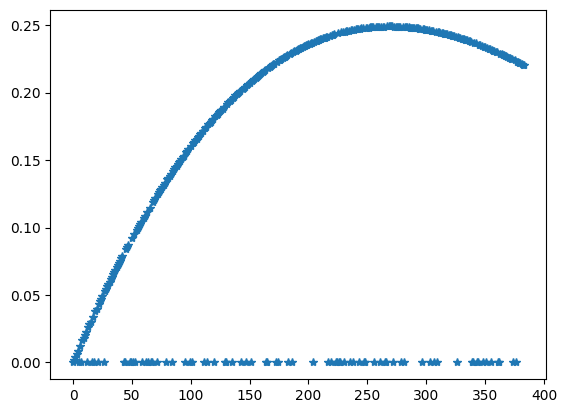

In [127]:
plt.figure()
plt.plot(tensor[0],"*")

In [128]:
tensor = tensor.reshape([128,128,3])

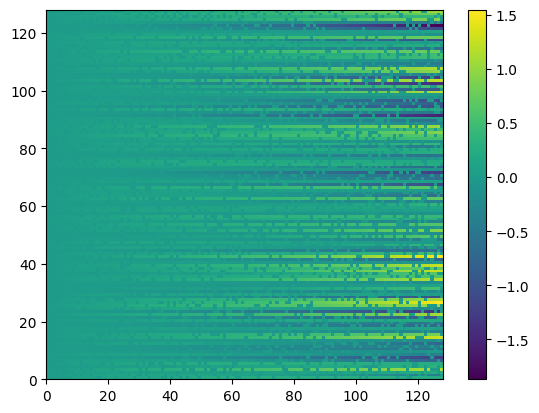

In [129]:
plt.figure()
plt.pcolormesh(tensor[:,:,0])
plt.colorbar()

## Get tensor charateristics

In [ ]:
# actual_rank= calculate_cp_rank(tensor.numpy())
# print("The acutal rank of the tensor is: ", actual_rank)

In [130]:
sparsity = calculate_sparsity(tensor.numpy())
print("The sparsity of the tensor is: ", sparsity)

The sparsity of the tensor is:  0.20245361328125


## Tensor compression

#### Jpeg

In [133]:
normalize_base, scale,zero_point, encoded_data, compressed_size_jpeg = compressor_jpeg(tensor, 100)
print("Compressed size: ", compressed_size_jpeg)

Compressed size:  33557


In [134]:
reconstructed_tensor_jpeg = decompressor_jpeg(tensor.shape, normalize_base, scale,zero_point,encoded_data )
snr_jpeg = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_jpeg.numpy())
mse_jpeg = calculate_mse(tensor.numpy(), reconstructed_tensor_jpeg.numpy())
print("Reconstruction snr (dB): ", snr_jpeg)
print("Reconstruction mse: ", mse_jpeg)

Reconstruction snr (dB):  29.880714416503906
Reconstruction mse:  0.00010169061


In [135]:
regular_jpeg_ratio = (tensor_size*4) / compressed_size_jpeg
regular_jpeg_snr = snr_jpeg
regular_jpeg_mse = mse_jpeg / torch.max(tensor).item()

#### Tensor decomposition

In [136]:
factors, compressed_size_decomposition = compressor_decomposition(tensor, 50)
print("Compressed size: ", compressed_size_decomposition)

Compressed size:  51800


In [137]:
reconstructed_tensor_decomposition = decompressor_decomposition(factors )
snr_decomposition = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_decomposition)
mse_decomposition = calculate_mse(tensor.numpy(), reconstructed_tensor_decomposition)
print("Reconstruction snr (dB): ", snr_decomposition)
print("Reconstruction mse: ", mse_decomposition)

Reconstruction snr (dB):  13.21926474571228
Reconstruction mse:  0.004714392


In [139]:
regular_decomposition_ratio = (tensor_size*4) / compressed_size_decomposition
regular_decomposition_snr = snr_decomposition
regular_decomposition_mse = mse_decomposition / torch.max(tensor).item() # percentage to the max value

#### Regression

In [140]:
factors, x_pos, x_neg, compressed_size_regression = compressor_regression(tensor.to(torch.float32), 3)
print("Compressed size: ", compressed_size_regression)

Compressed size:  13824.0


In [141]:
reconstructed_tensor_regression = decompressor_regression(tensor.shape, factors, x_pos,x_neg )
snr_regression = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_regression.numpy())
mse_regression = calculate_mse(tensor.numpy(), reconstructed_tensor_regression.numpy())
print("Reconstruction snr (dB): ", snr_regression)
print("Reconstruction mse: ", mse_regression)

Reconstruction snr (dB):  31.217010021209717
Reconstruction mse:  7.475688e-05


In [142]:
regular_regression_ratio = (tensor_size*4) / compressed_size_regression
regular_regression_snr = snr_regression
regular_regression_mse = mse_regression/ torch.max(tensor).item()

#### Sketch ML

In [144]:
minmaxsketch,bucket_means, keys, compressed_size_sketchml = compressor_sketchml(tensor,128,0.3,5)
print("Compressed size: ", compressed_size_sketchml)

Compressed size:  54577


In [145]:
reconstructed_tensor_sketchml = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)
snr_sketchml = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_sketchml.numpy())
mse_sketchml = calculate_mse(tensor.numpy(), reconstructed_tensor_sketchml.numpy())
print("Reconstruction snr (dB): ", snr_sketchml)
print("Reconstruction mse: ", mse_sketchml)

Reconstruction snr (dB):  4.255892336368561
Reconstruction mse:  0.03713325


In [146]:
regular_sketchml_ratio = (tensor_size*4) / compressed_size_sketchml
regular_sketchml_snr = snr_sketchml
regular_sketchml_mse = mse_sketchml/ torch.max(tensor).item()

# Non-regular distributed (Random) tensor

## Generate a random tensor

In [191]:
import random

In [192]:
random.seed(5)

In [193]:
tensor = torch.zeros([128,128*3])

In [194]:
for i in range(128):
    for j in range(128*3):
        if random.random()>0.4:
            tensor[i][j] = random.random()


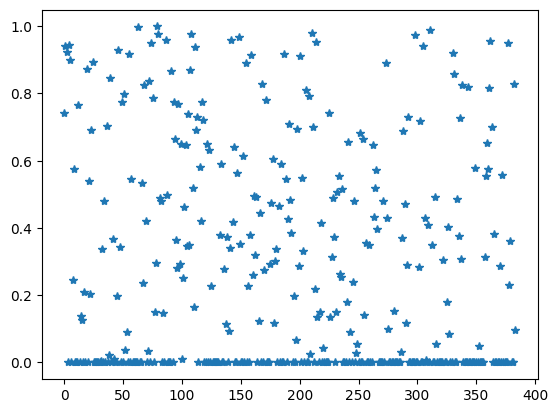

In [195]:
plt.figure()
plt.plot(tensor[0],"*")

In [196]:
tensor = tensor.reshape([128,128,3])

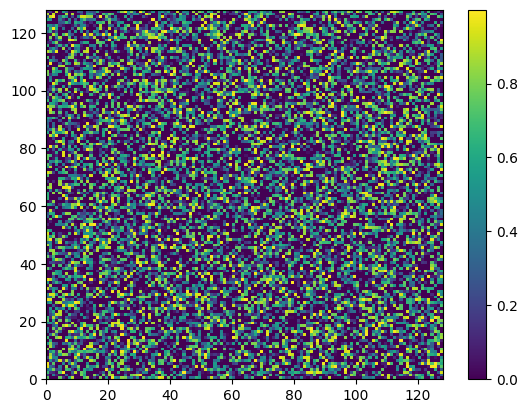

In [197]:
plt.figure()
plt.pcolormesh(tensor[:,:,0])
plt.colorbar()

## Get tensor charateristics

In [ ]:
# actual_rank= calculate_cp_rank(tensor.numpy())
# print("The acutal rank of the tensor is: ", actual_rank)

In [198]:
sparsity = calculate_sparsity(tensor.numpy())
print("The sparsity of the tensor is: ", sparsity)

The sparsity of the tensor is:  0.4012451171875


## Tensor compression

#### Jpeg

In [199]:
normalize_base, scale,zero_point, encoded_data, compressed_size_jpeg = compressor_jpeg(tensor, 100)
print("Compressed size: ", compressed_size_jpeg)

Compressed size:  63519


In [200]:
reconstructed_tensor_jpeg = decompressor_jpeg(tensor.shape, normalize_base, scale,zero_point,encoded_data )
snr_jpeg = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_jpeg.numpy())
mse_jpeg = calculate_mse(tensor.numpy(), reconstructed_tensor_jpeg.numpy())
print("Reconstruction snr (dB): ", snr_jpeg)
print("Reconstruction mse: ", mse_jpeg)

Reconstruction snr (dB):  9.075320959091187
Reconstruction mse:  0.024650073


In [201]:
random_jpeg_ratio = (tensor_size*4) / compressed_size_jpeg
random_jpeg_snr = snr_jpeg
random_jpeg_mse = mse_jpeg / torch.max(tensor).item()

#### Tensor decomposition

In [202]:
factors, compressed_size_decomposition = compressor_decomposition(tensor, 50)
print("Compressed size: ", compressed_size_decomposition)

Compressed size:  51800


In [203]:
reconstructed_tensor_decomposition = decompressor_decomposition(factors )
snr_decomposition = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_decomposition)
mse_decomposition = calculate_mse(tensor.numpy(), reconstructed_tensor_decomposition)
print("Reconstruction snr (dB): ", snr_decomposition)
print("Reconstruction mse: ", mse_decomposition)

Reconstruction snr (dB):  5.124928951263428
Reconstruction mse:  0.061214935


In [204]:
random_decomposition_ratio = (tensor_size*4) / compressed_size_decomposition
random_decomposition_snr = snr_decomposition
random_decomposition_mse = mse_decomposition / torch.max(tensor).item() # percentage to the max value

#### Regression

In [205]:
factors, x_pos, x_neg, compressed_size_regression = compressor_regression(tensor.to(torch.float32), 10)
print("Compressed size: ", compressed_size_regression)

Compressed size:  17408.0


In [206]:
reconstructed_tensor_regression = decompressor_regression(tensor.shape, factors, x_pos,x_neg )
snr_regression = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_regression.numpy())
mse_regression = calculate_mse(tensor.numpy(), reconstructed_tensor_regression.numpy())
print("Reconstruction snr (dB): ", snr_regression)
print("Reconstruction mse: ", mse_regression)

Reconstruction snr (dB):  6.272825598716736
Reconstruction mse:  0.046996742


In [207]:
random_regression_ratio = (tensor_size*4) / compressed_size_regression
random_regression_snr = snr_regression
random_regression_mse = mse_regression/ torch.max(tensor).item()

In [208]:
random_regression_ratio

11.294117647058824

#### Sketch ML

In [215]:
minmaxsketch,bucket_means, keys, compressed_size_sketchml = compressor_sketchml(tensor,128,0.4,2)
print("Compressed size: ", compressed_size_sketchml)

Compressed size:  21776


In [216]:
reconstructed_tensor_sketchml = decompressor_sketchml(tensor.shape, minmaxsketch,bucket_means, keys)
snr_sketchml = calculate_snr(tensor_size,tensor.numpy(), reconstructed_tensor_sketchml.numpy())
mse_sketchml = calculate_mse(tensor.numpy(), reconstructed_tensor_sketchml.numpy())
print("Reconstruction snr (dB): ", snr_sketchml)
print("Reconstruction mse: ", mse_sketchml)

Reconstruction snr (dB):  6.5486180782318115
Reconstruction mse:  0.04410507


In [211]:
random_sketchml_ratio = (tensor_size*4) / compressed_size_sketchml
random_sketchml_snr = snr_sketchml
random_sketchml_mse = mse_sketchml/ torch.max(tensor).item()

# Plotting

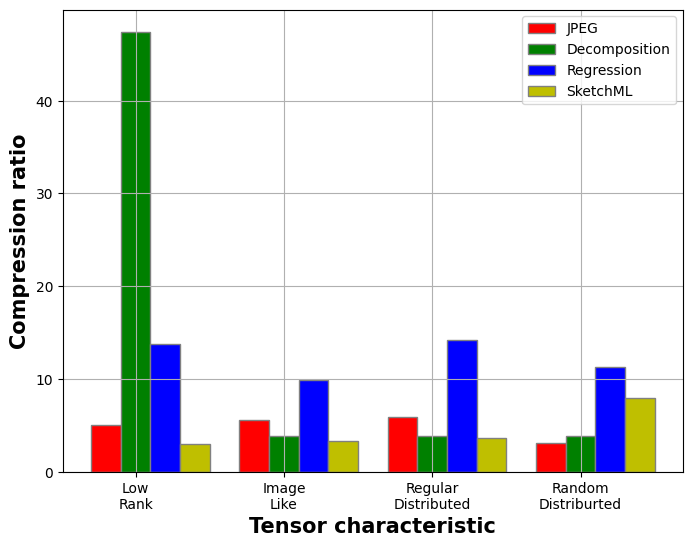

In [222]:
barWidth = 0.2
fig = plt.subplots(figsize =(8, 6)) 

# set height of bar 
jpeg = [lowrank_jpeg_ratio, image_jpeg_ratio,regular_jpeg_ratio,random_jpeg_ratio] 
decomposition = [lowrank_decomposition_ratio, image_decomposition_ratio,regular_decomposition_ratio,random_decomposition_ratio] 
regression = [lowrank_regression_ratio, image_regression_ratio,regular_regression_ratio,random_regression_ratio] 
sketchml = [lowrank_sketchml_ratio, image_sketchml_ratio,regular_sketchml_ratio,random_sketchml_ratio]

# Set position of bar on X axis 
br1 = np.arange(len(jpeg)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot
plt.bar(br1, jpeg, color ='r', width = barWidth, 
        edgecolor ='grey', label ='JPEG') 
plt.bar(br2, decomposition, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Decomposition') 
plt.bar(br3, regression, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Regression') 
plt.bar(br4, sketchml, color ='y', width = barWidth, 
        edgecolor ='grey', label ='SketchML') 

# Adding Xticks 
plt.xlabel('Tensor characteristic', fontweight ='bold', fontsize = 15) 
plt.ylabel('Compression ratio', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(jpeg))], 
        ['Low\nRank', 'Image\nLike', 'Regular\nDistributed', 'Random\nDistriburted'])

plt.legend()
plt.grid()
plt.show() 

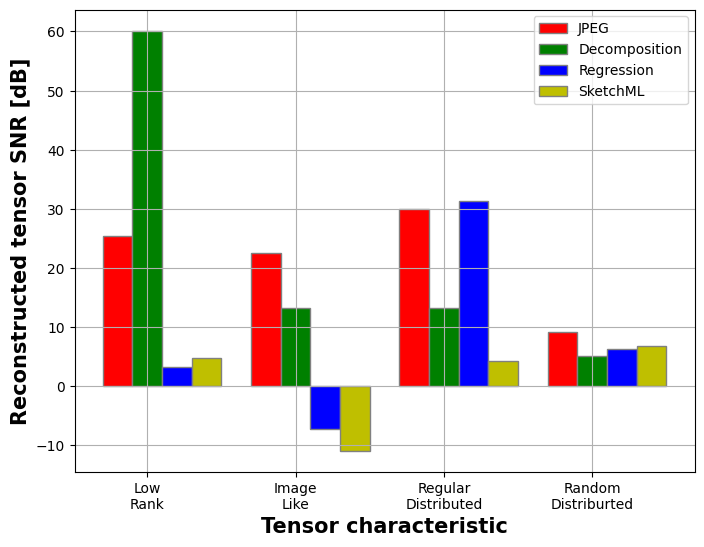

In [223]:
barWidth = 0.2
fig = plt.subplots(figsize =(8, 6)) 

# set height of bar 
jpeg = [lowrank_jpeg_snr, image_jpeg_snr,regular_jpeg_snr,random_jpeg_snr] 
decomposition = [lowrank_decomposition_snr, image_decomposition_snr,regular_decomposition_snr,random_decomposition_snr] 
regression = [lowrank_regression_snr, image_regression_snr,regular_regression_snr,random_regression_snr] 
sketchml = [lowrank_sketchml_snr, image_sketchml_snr,regular_sketchml_snr,random_sketchml_snr]

# Set position of bar on X axis 
br1 = np.arange(len(jpeg)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot
plt.bar(br1, jpeg, color ='r', width = barWidth, 
        edgecolor ='grey', label ='JPEG') 
plt.bar(br2, decomposition, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Decomposition') 
plt.bar(br3, regression, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Regression') 
plt.bar(br4, sketchml, color ='y', width = barWidth, 
        edgecolor ='grey', label ='SketchML') 

# Adding Xticks 
plt.xlabel('Tensor characteristic', fontweight ='bold', fontsize = 15) 
plt.ylabel('Reconstructed tensor SNR [dB]', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(jpeg))], 
        ['Low\nRank', 'Image\nLike', 'Regular\nDistributed', 'Random\nDistriburted'])

plt.legend()
plt.grid()
plt.show() 

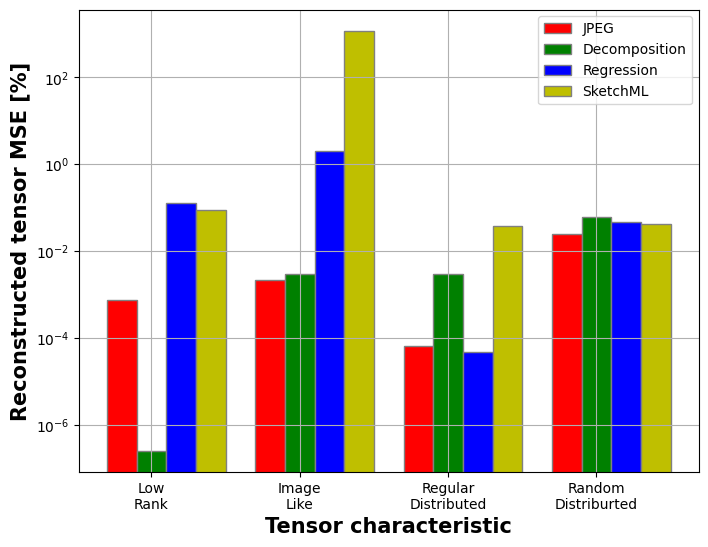

In [225]:
barWidth = 0.2
fig = plt.subplots(figsize =(8, 6)) 

# set height of bar 
jpeg = [lowrank_jpeg_mse, image_jpeg_mse,regular_jpeg_mse,random_jpeg_mse] 
decomposition = [lowrank_decomposition_mse, image_decomposition_mse,regular_decomposition_mse,random_decomposition_mse] 
regression = [lowrank_regression_mse, image_regression_mse,regular_regression_mse,random_regression_mse] 
sketchml = [lowrank_sketchml_mse, image_sketchml_mse,regular_sketchml_mse,random_sketchml_mse]

# Set position of bar on X axis 
br1 = np.arange(len(jpeg)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
br4 = [x + barWidth for x in br3] 

# Make the plot
plt.bar(br1, jpeg, color ='r', width = barWidth, 
        edgecolor ='grey', label ='JPEG') 
plt.bar(br2, decomposition, color ='g', width = barWidth, 
        edgecolor ='grey', label ='Decomposition') 
plt.bar(br3, regression, color ='b', width = barWidth, 
        edgecolor ='grey', label ='Regression') 
plt.bar(br4, sketchml, color ='y', width = barWidth, 
        edgecolor ='grey', label ='SketchML') 

# Adding Xticks 
plt.xlabel('Tensor characteristic', fontweight ='bold', fontsize = 15) 
plt.ylabel('Reconstructed tensor MSE [%]', fontweight ='bold', fontsize = 15) 
plt.xticks([r + barWidth for r in range(len(jpeg))], 
        ['Low\nRank', 'Image\nLike', 'Regular\nDistributed', 'Random\nDistriburted'])

plt.legend()
plt.yscale("log")
plt.grid()
plt.show() 